# Введение в регрессию 1
Давайте рассмотрим нарушения предпосылок Гаусса-Маркова на примере симулированных данных.

In [1]:
# Подключим нужные для базовых операций библиотеки
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Подключим пакеты для использования OLS метода и тестов
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Подгрузим полезные функции
from utils import *

# Сделаем автоподгрузку всех изменений при перепрогонке ячейки
%load_ext autoreload
%autoreload 2

## 1. Неверный тип зависимостей
Сгенерируем несколько кейсов, когда зависимость между факторами и таргетом в действительности нелинейная, но мы воспринимаем ее как линейную и применяем OLS алгоритм.

In [2]:
# Определим параметры выборки для задачи преобразования факторов
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 5,
    x1_width = 2.8,
    x2_mean = 20,
    x2_std = 5,
    
    # Зададим параметры распределения ошибки
    e_mean = 0,
    e_std = 300,

    # Укажем размер выборки
    N = 2000,

    # Зададим действительные параметры модели
    beta0 = 500,
    beta1 = 6.7,
    beta2 = 2.3
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

In [3]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_linearity = gen_data(y_type='linearity', params=dist_params, seed=RANDOM_SEED)

display(dt_linearity)

x1         x2          x3           e            y
0     4.648712  22.483571  104.450402  149.014246  1348.831937
1     6.262000  19.308678  524.266456  -41.479290  3971.105962
2     5.649583  23.238443  284.172952  194.306561  2598.265337
3     5.276244  27.615149  195.633646  456.908957  2267.654383
4     4.036852  18.829233   56.647746  -70.246012   809.293884
...        ...        ...         ...         ...          ...
1995  5.439474  25.350751  230.321104  321.045071  2364.196465
1996  6.278521  19.867394  532.999741   -7.956378  4063.141890
1997  3.793082  15.590627   44.393029 -264.562395   532.870897
1998  3.759753  19.184665   42.937828  -48.920089   738.763361
1999  4.390124  16.275487   80.650404 -223.470793   816.886911

[2000 rows x 5 columns]

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


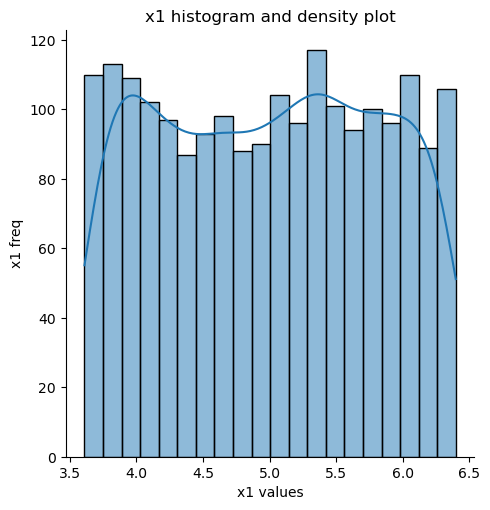

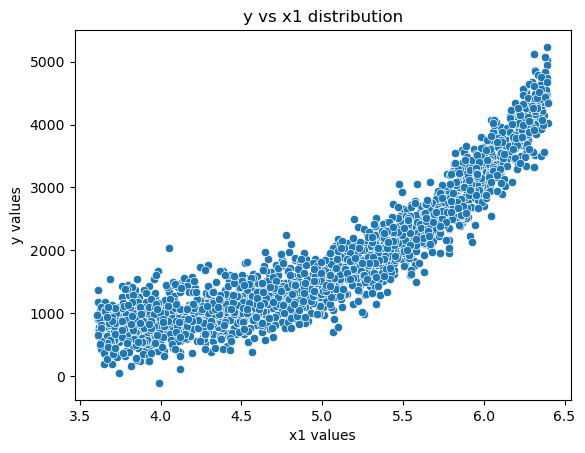

In [4]:
# Отрисуем факторы
plot_data(dt_linearity, target='y', feature_names=['x1'], plot_type='EDA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     9262.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:17   Log-Likelihood:                -15089.
No. Observations:                2000   AIC:                         3.018e+04
Df Residuals:                    1998   BIC:                         3.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4146.3620     63.337    -65.465      0.0

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


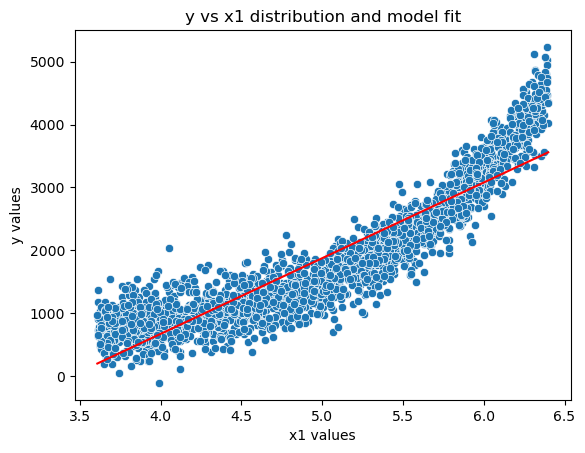

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


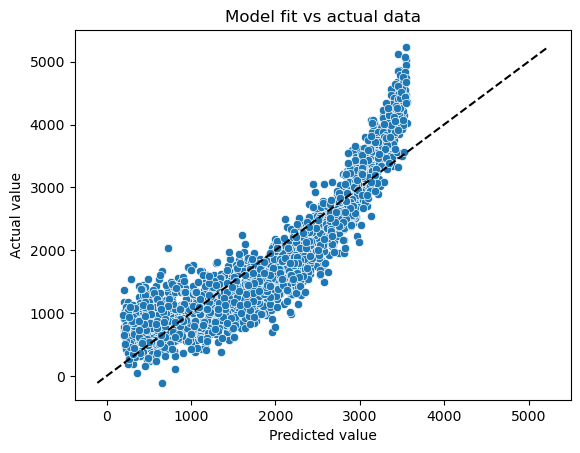

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


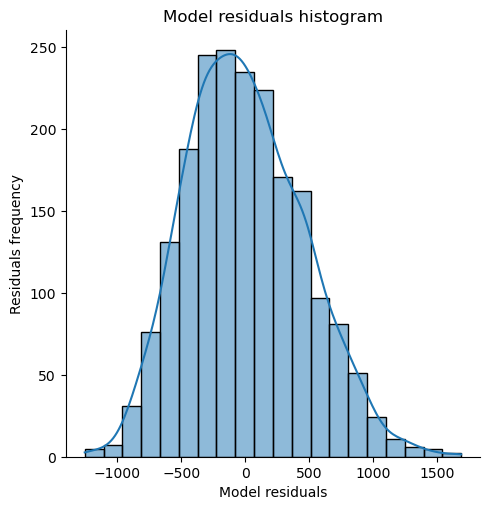

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05       0.0             False   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05       0.0             False   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.016598             False   
5               Lilliefors test     0.95     0.05     0.001             False   
6         Cramér–von Mises test     0.95     0.05  0.010761             False   
7              Chi-squared test     0.95     0.05       0.0             False   
8              Jarque–Bera test     0.95     0.05       0.0             False   
9                      skewtest     0.95     0.05       0.0             False   
10                 kurtosistest     0.95     0.05  0.381679              True   

                  statistic critical_value statistic < critical_value  \
0                  0.991704                                             
1                         -              -                      False   
2                 36.985933                                             
3                  4.334738          0.785                      False   
4                  0.034525                                             
5                  0.034528                                             
6                  0.730129                                             
7   150119987579016445952.0                                             
8                 38.729458                                             
9                  6.018359                                             
10                -0.874808                                             

                   conclusion  
0   not gaussian distribution  
1        count more than 1000  
2   not gaussian distribution  
3   not gaussian distribution  
4   not gaussian distribution  
5   not gaussian distribution  
6   not gaussian distribution  
7   not gaussian distribution  
8   not gaussian distribution  
9   not gaussian distribution  
10      gaussian distribution

In [5]:
# Обучим модель c неверной спецификацией и выведем результаты
# Здесь мы берем в качестве фактора сырые значения x1
dt_linearity, model_linearity = train_model(dt_linearity, target='y', feature_names=['x1'], show_results=True, pairwise=True, return_norm_tests=True)

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


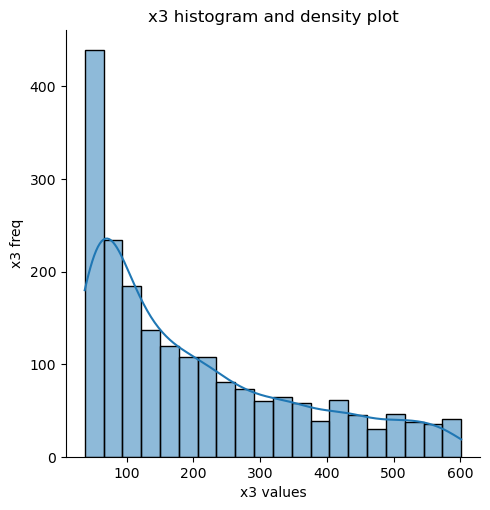

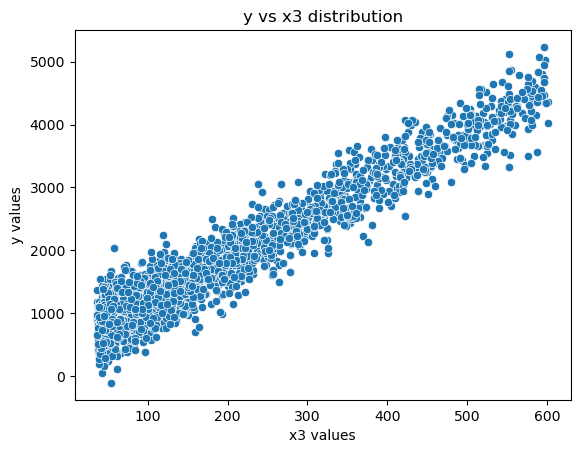

In [6]:
# Отрисуем факторы
plot_data(dt_linearity, target='y', feature_names=['x3'], plot_type='EDA')

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.482e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:18   Log-Likelihood:                -14221.
No. Observations:                2000   AIC:                         2.845e+04
Df Residuals:                    1998   BIC:                         2.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.2702     10.904     46.339      0.0

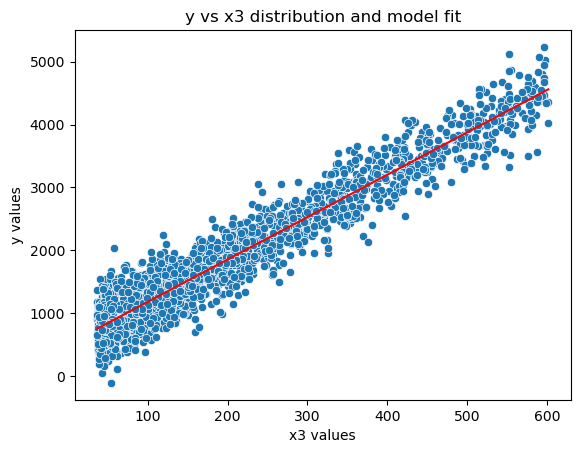

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


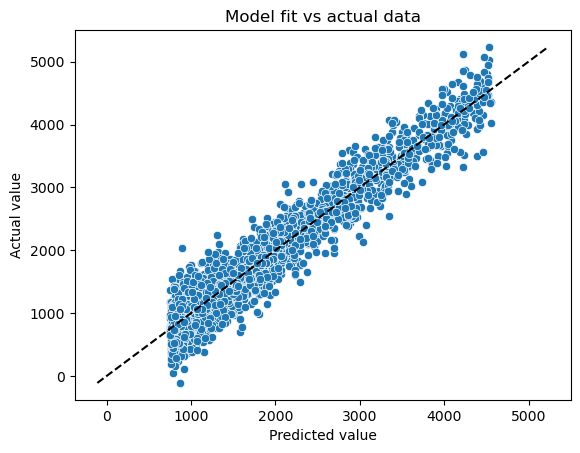

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


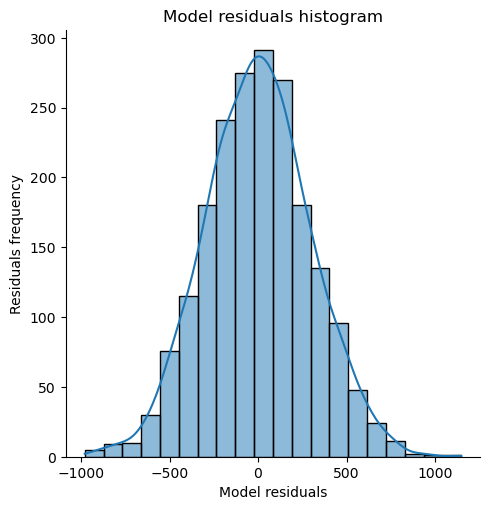

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05   0.89688              True   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05  0.708933              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.938226              True   
5               Lilliefors test     0.95     0.05  0.720605              True   
6         Cramér–von Mises test     0.95     0.05    0.9783              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05  0.738401              True   
9                      skewtest     0.95     0.05  0.574912              True   
10                 kurtosistest     0.95     0.05  0.541127              True   

                  statistic critical_value statistic < critical_value  \
0                  0.999487                                             
1                         -              -                      False   
2                  0.687987                                             
3                  0.208601          0.785                       True   
4                  0.011852                                             
5                  0.011904                                             
6                  0.029343                                             
7  -281474976710656524288.0                                             
8                  0.606535                                             
9                  0.560831                                             
10                  0.61111                                             

               conclusion  
0   gaussian distribution  
1    count more than 1000  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8   gaussian distribution  
9   gaussian distribution  
10  gaussian distribution

In [7]:
# Обучим модель c верной спецификацией и выведем результаты
dt_linearity, model_linearity = train_model(dt_linearity, target='y', feature_names=['x3'], show_results=True, pairwise=True, return_norm_tests=True)

## 2. Пропущенная переменная
Сгенерируем несколько кейсов, когда мы пропустили переменную и применяем OLS алгоритм.

In [8]:
# Определим параметры выборки для задачи пропущенной переменной
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 25.0,
    x1_std = 10.3,
    x2_mean = 20.0,
    x2_std = 5.0,
    x3_mean = 30.0,
    x3_std = 8.0,
    corr_12 = 0.0,
    corr_23 = 0.0,
    corr_13 = 0.6,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 30.0,

    # Укажем размер выборки
    N = 2000,

    # Зададим действительные параметры модели
    beta0 = 500.0,
    beta1 = 6.7,
    beta2 = 2.3,
    beta3 = -17.7
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

x1         x2         x3          e           y
0     19.692193  16.761557  27.418197 -33.422441  151.764749
1      9.310879  21.170685  21.197736 -18.927925  216.947620
2     11.849820  22.347372  16.157533 -28.261806  316.542614
3     18.238207  22.328649  28.638072 -16.439875  150.218123
4     16.717643  28.624589  37.358696  -6.424509   10.171325
...         ...        ...        ...        ...         ...
1995  28.132897  19.795376  37.418537  66.295670  138.007341
1996  19.510030  17.311159  29.013193   9.809835  166.809178
1997  18.908264  17.406035  32.669227 -25.053735   63.420201
1998  17.043469  14.236759  23.589215  49.587392  278.994079
1999  38.407328  25.851404  35.725279  62.333328  246.783206

[2000 rows x 5 columns]

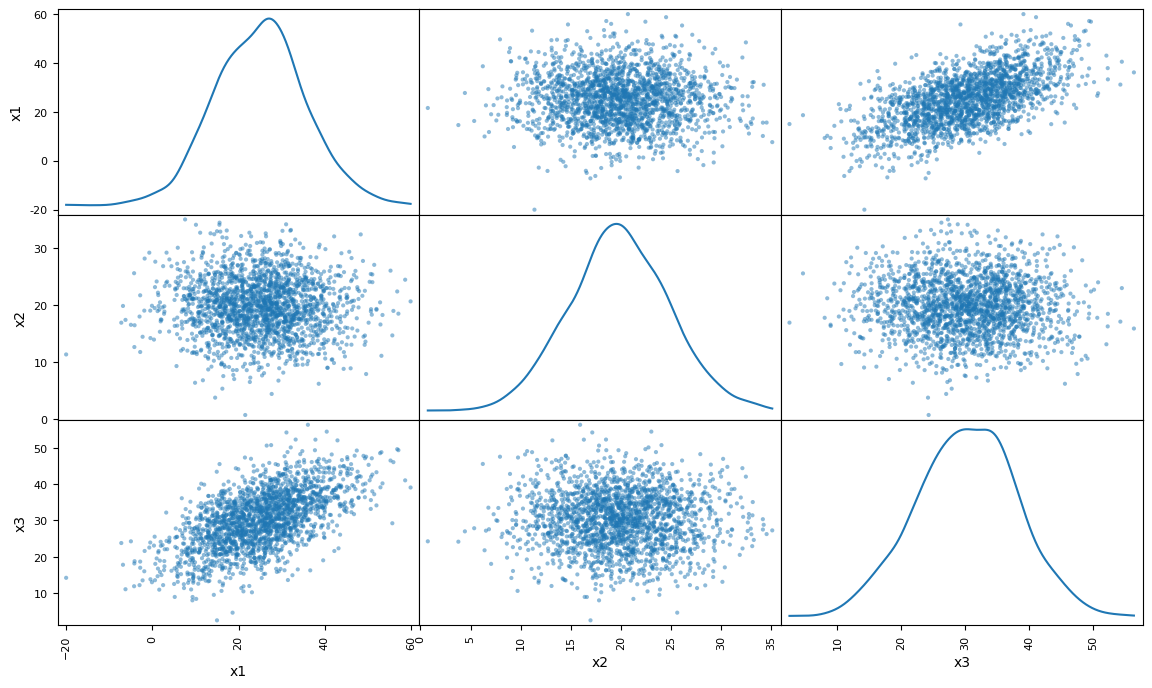

In [9]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_missing_var = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(dt_missing_var)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_missing_var[['x1', 'x2', 'x3']], figsize = (14,8), diagonal = 'kde');

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


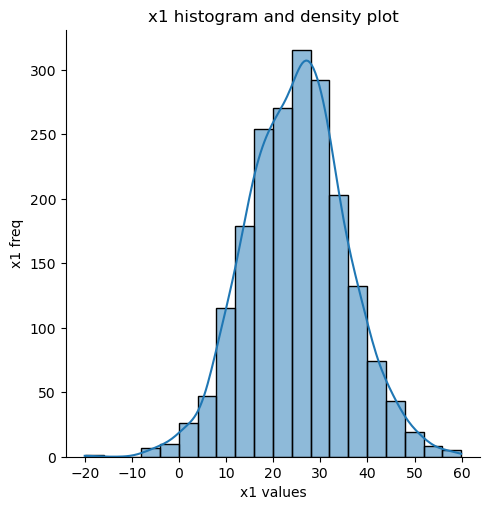

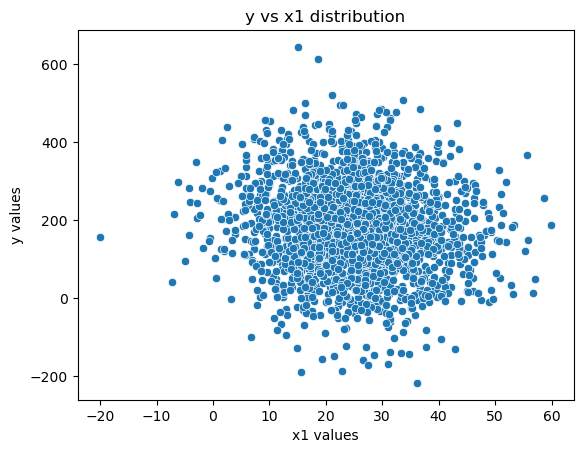

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


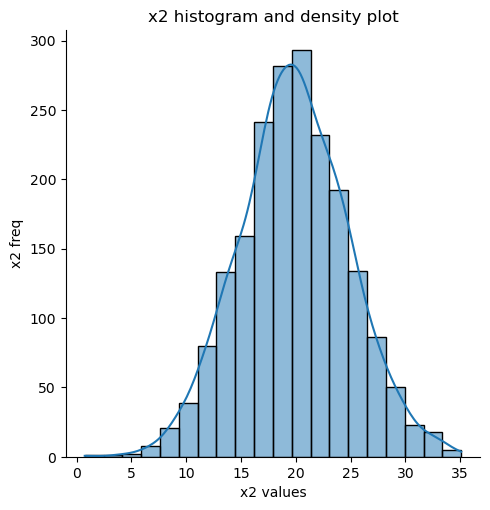

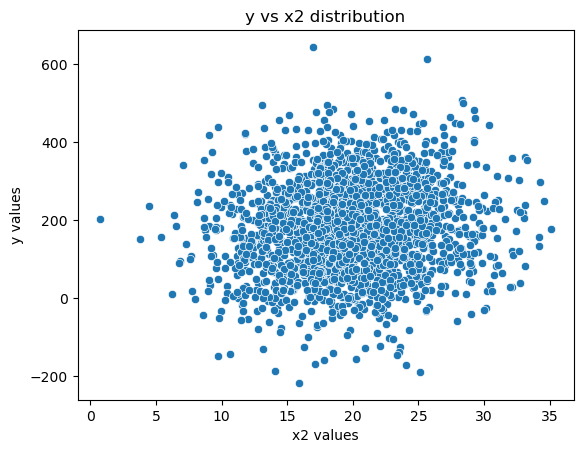

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


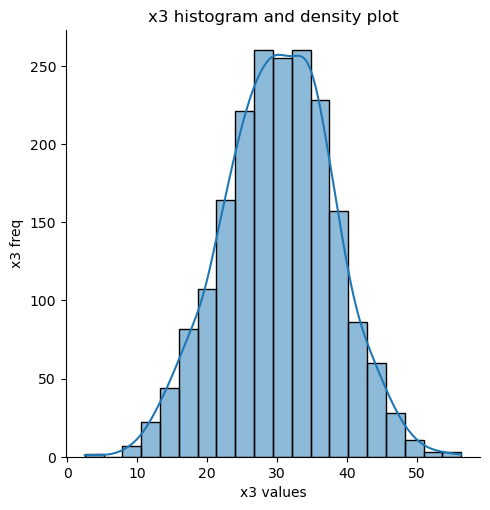

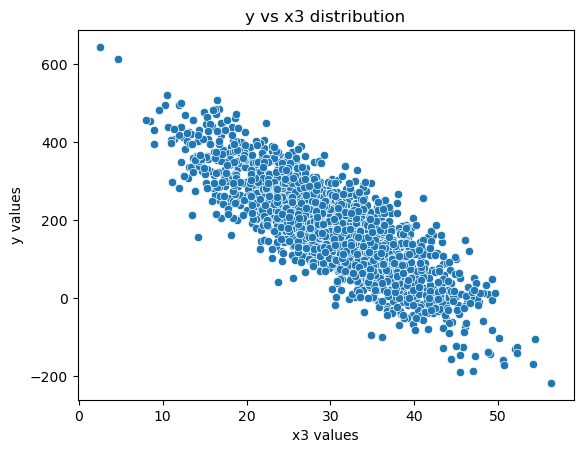

In [10]:
# Отрисуем факторы
plot_data(dt_missing_var, target='y', feature_names=['x1', 'x2', 'x3'], plot_type='EDA')

### Обучение модели с неверной спецификацией
Теперь мы решем построить линейную модель, чтобы найти взаимосвязь между нашими факторами x1, x2 и таргетом y

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.19
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           7.86e-10
Time:                        11:39:19   Log-Likelihood:                -12341.
No. Observations:                2000   AIC:                         2.469e+04
Df Residuals:                    1997   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.9906     12.471     12.348      0.0

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


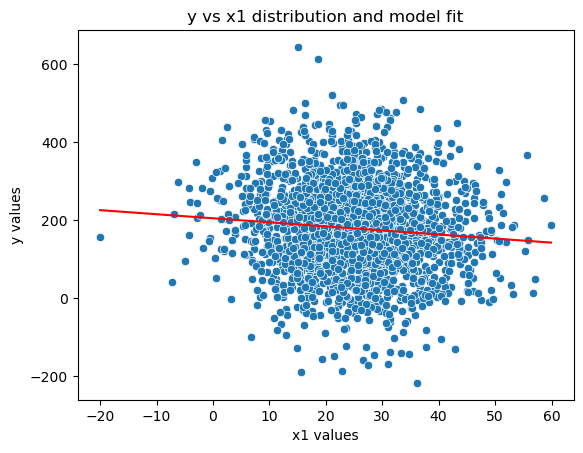

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


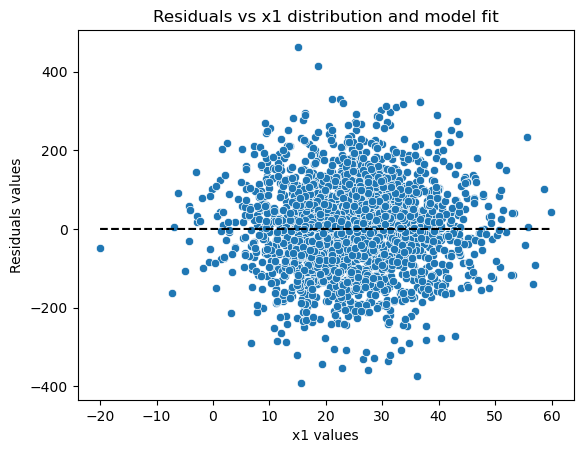

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


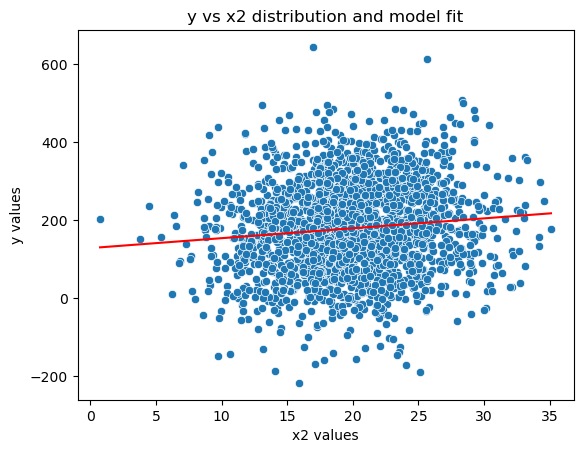

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


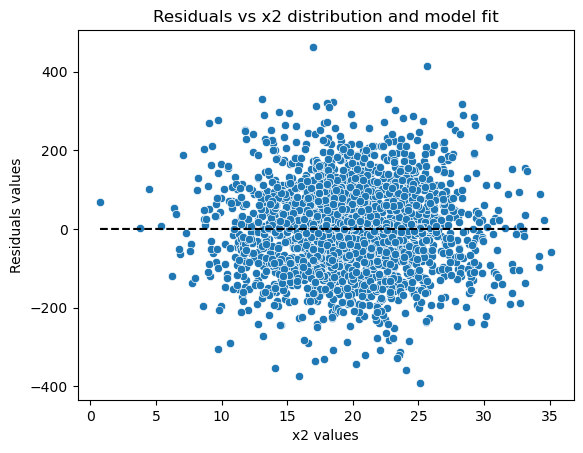

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


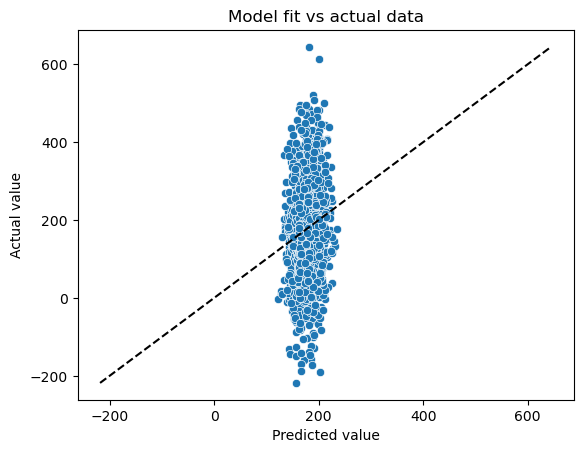

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


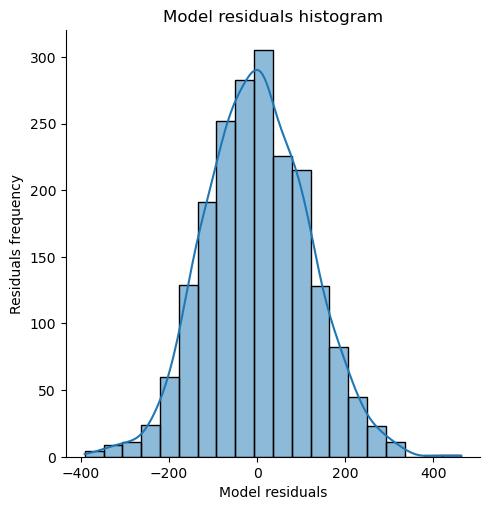

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.294423              True   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05   0.33373              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.616307              True   
5               Lilliefors test     0.95     0.05  0.203256              True   
6         Cramér–von Mises test     0.95     0.05  0.793676              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05  0.348734              True   
9                      skewtest     0.95     0.05  0.257508              True   
10                 kurtosistest     0.95     0.05  0.339388              True   

                  statistic critical_value statistic < critical_value  \
0                  0.998957                                             
1                         -              -                      False   
2                  2.194847                                             
3                  0.453486          0.785                       True   
4                  0.016832                                             
5                  0.016854                                             
6                  0.063236                                             
7  -562949953421312851968.0                                             
8                  2.106889                                             
9                    1.1323                                             
10                 0.955375                                             

               conclusion  
0   gaussian distribution  
1    count more than 1000  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8   gaussian distribution  
9   gaussian distribution  
10  gaussian distribution

In [11]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=True)

### Обучение модели с корректной спецификацией
Допустим, мы поигрались со различными спецификациями и нашли ту, которую считаем наиболее правильной для описания процесса

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     8822.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:20   Log-Likelihood:                -9704.2
No. Observations:                2000   AIC:                         1.942e+04
Df Residuals:                    1996   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.6971      3.964    125.569      0.0

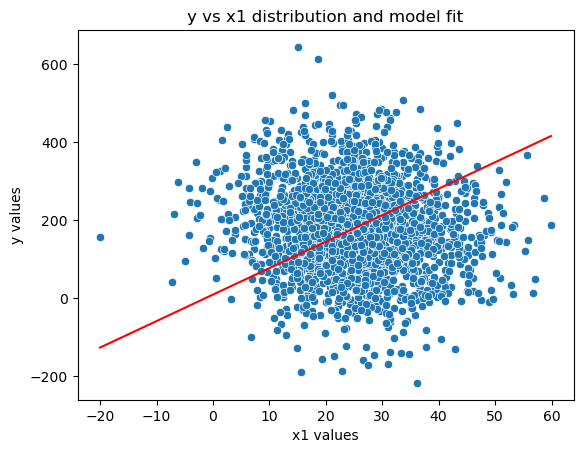

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


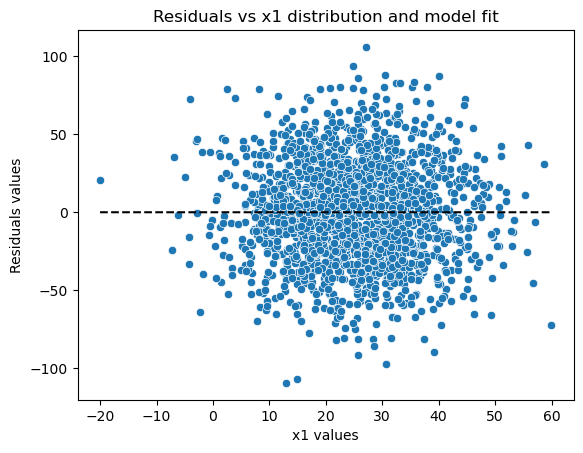

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


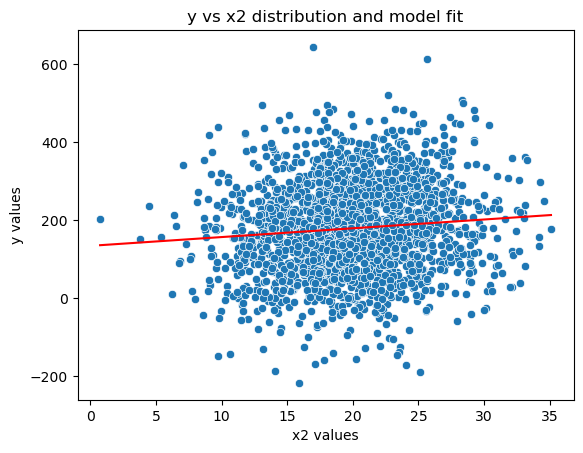

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


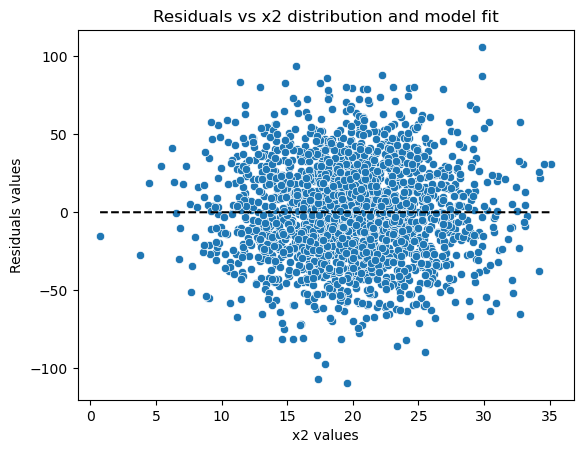

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


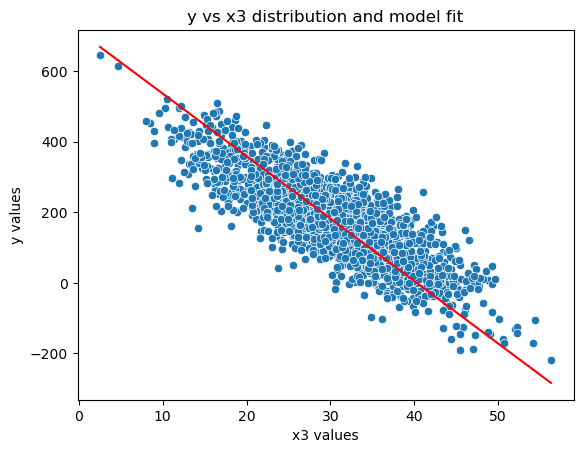

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


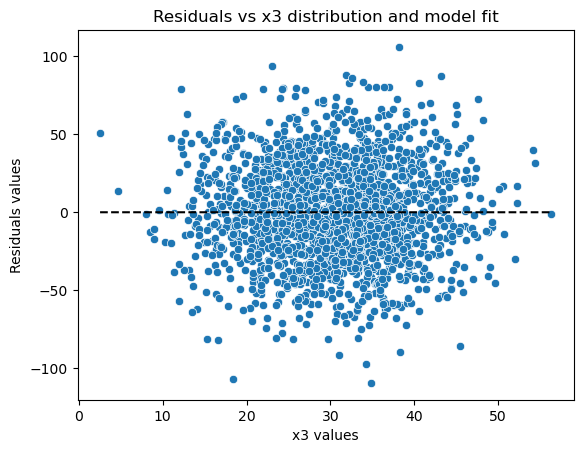

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


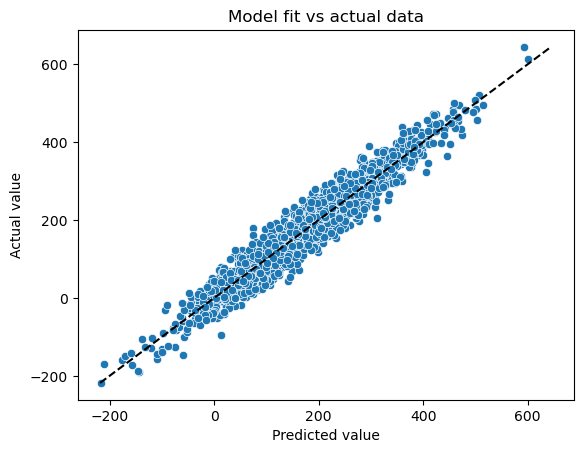

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


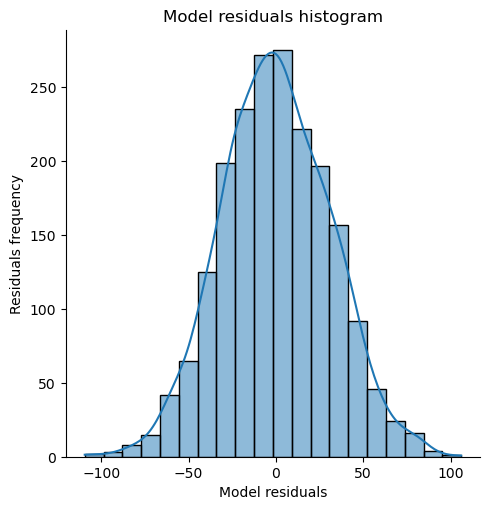

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.635899              True   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05  0.724071              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.779323              True   
5               Lilliefors test     0.95     0.05  0.398343              True   
6         Cramér–von Mises test     0.95     0.05  0.662844              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05  0.713611              True   
9                      skewtest     0.95     0.05  0.433271              True   
10                 kurtosistest     0.95     0.05  0.858706              True   

                  statistic critical_value statistic < critical_value  \
0                  0.999264                                             
1                         -              -                      False   
2                  0.645731                                             
3                  0.476538          0.785                       True   
4                  0.014634                                             
5                   0.01465                                             
6                   0.08512                                             
7  -125099989649180442624.0                                             
8                  0.674836                                             
9                  0.783607                                             
10                -0.178022                                             

               conclusion  
0   gaussian distribution  
1    count more than 1000  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8   gaussian distribution  
9   gaussian distribution  
10  gaussian distribution

In [12]:
# Обучим модель и выведем результаты
dt_missing_var, model_missing_var = train_model(dt_missing_var, target='y', feature_names=['x1', 'x2', 'x3'], show_results=True, return_norm_tests=True)

In [13]:
# Определим параметры выборки для задачи мультиколлинеарности
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 100.0,
    x1_std = 10.0,
    x2_mean = 20.0,
    x2_std = 5.0,
    x3_mean = 30.0,
    x3_std = 8.0,
    corr_12 = 0.4,
    corr_23 = 0.95,
    corr_13 = 0.3,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 100.0,

    # Укажем размер выборки
    N = 2000,

    # Зададим действительные параметры модели
    beta0 = 500.0,
    beta1 = -6.7,
    beta2 = 2.3,
    beta3 = 17.7
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

x1         x2         x3           e           y
0      95.042885  17.739813  28.249383 -111.408136  292.620183
1      85.597184  14.907688  22.209226  -63.093083  290.796767
2      90.059062  12.062322  16.305376  -94.206018  118.746772
3      92.960606  19.687457  29.043576  -54.799582  381.716793
4      88.302167  26.389591  37.867919  -21.415031  617.918673
...          ...        ...        ...         ...         ...
1995  100.994012  24.493109  37.675529  220.985567  767.516710
1996   94.304555  18.836099  29.927487   32.699451  473.898480
1997   92.424000  21.099537  33.942420  -83.512450  446.556529
1998   93.425451  14.859513  24.741720  165.291305  511.446100
1999  112.816399  24.721146  33.853233  207.777759  607.968737

[2000 rows x 5 columns]

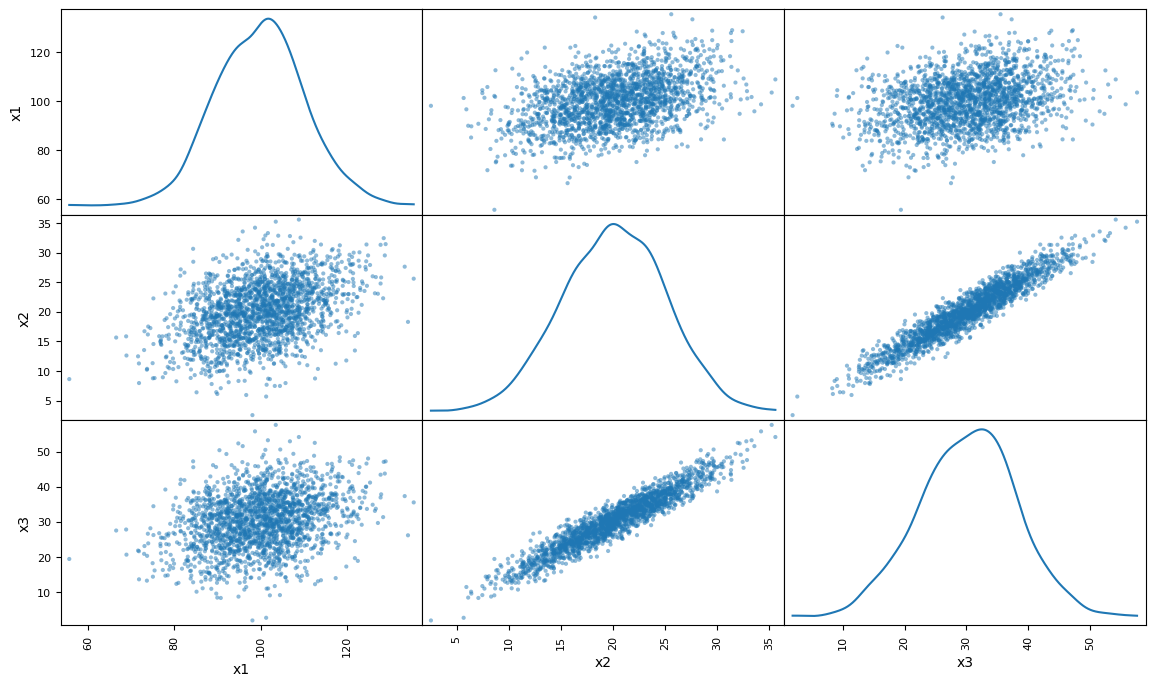

In [14]:
# Сгенерируем датасет с нормальным распределением в регрессоре
dt_collinearity = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(dt_collinearity)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_collinearity[['x1', 'x2', 'x3']], figsize = (14,8), diagonal = 'kde');

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


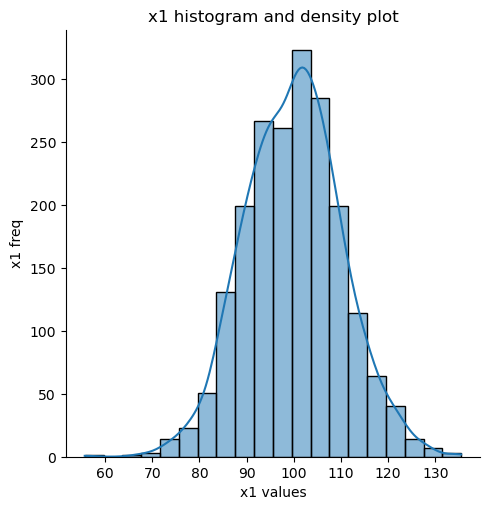

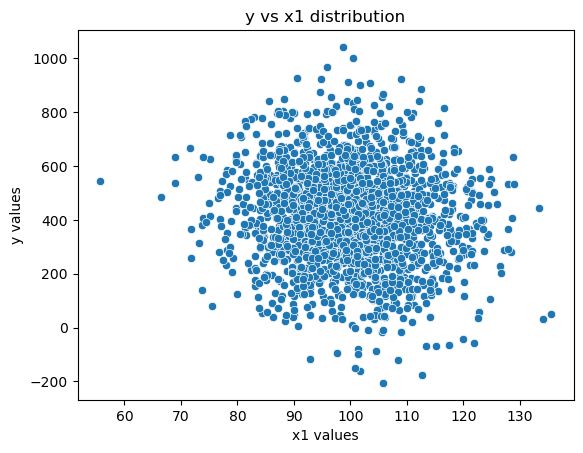

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


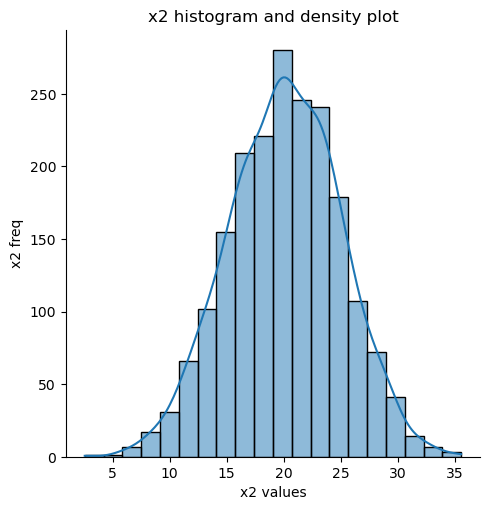

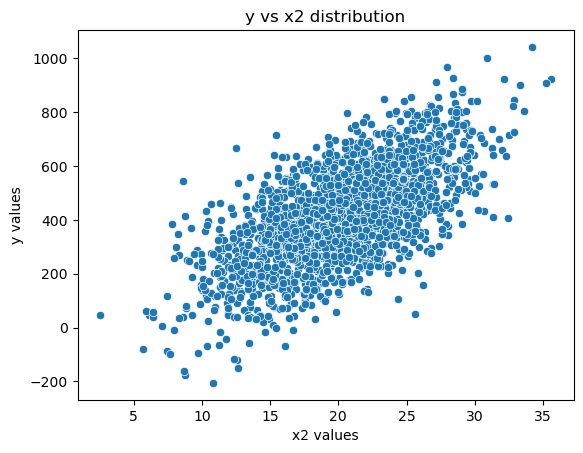

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


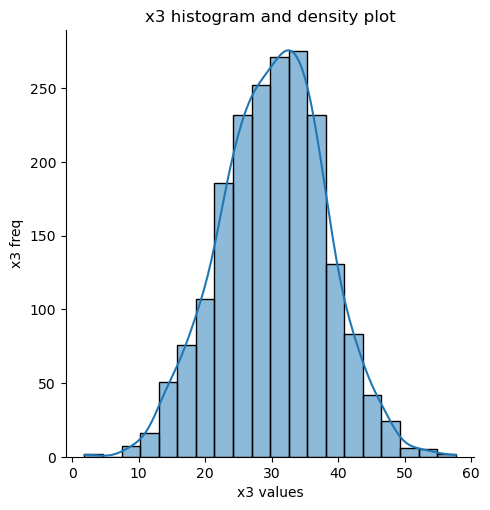

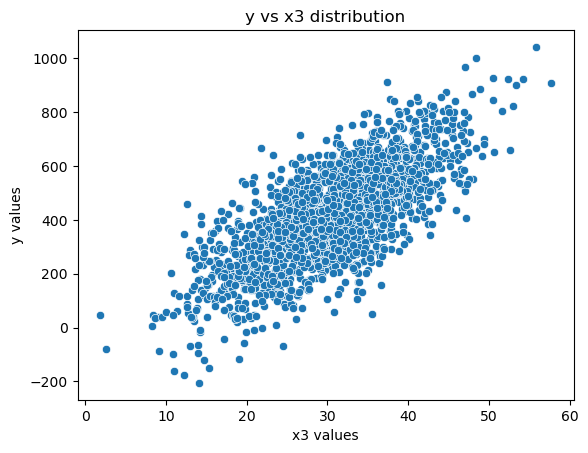

In [15]:
# Отрисуем факторы
plot_data(dt_collinearity, target='y', feature_names=['x1', 'x2', 'x3'], plot_type='EDA')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     1312.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:39:21   Log-Likelihood:                -12112.
No. Observations:                2000   AIC:                         2.423e+04
Df Residuals:                    1996   BIC:                         2.425e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.3327     23.409     19.750      0.0

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


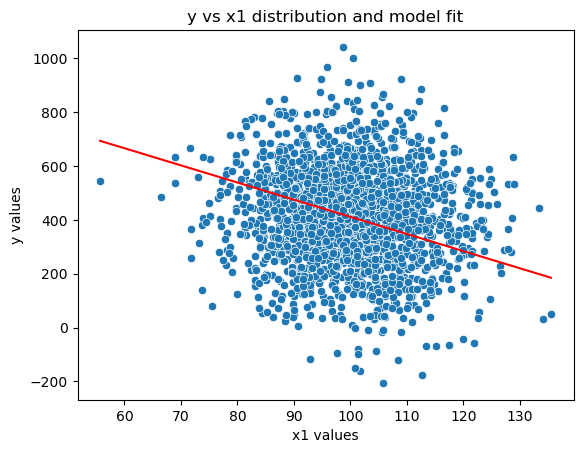

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


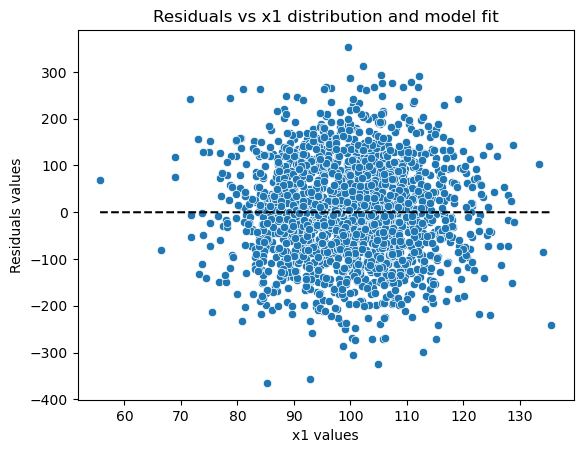

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


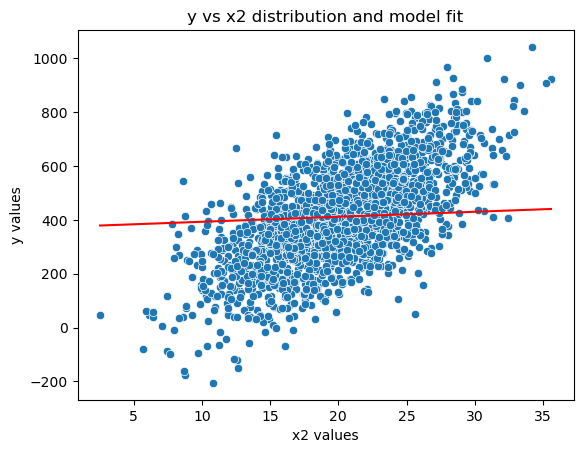

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


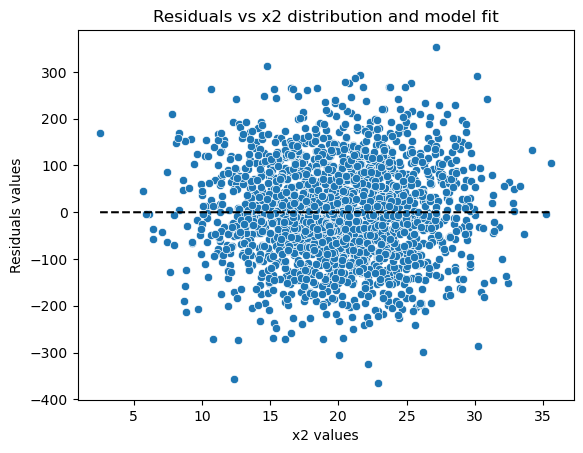

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


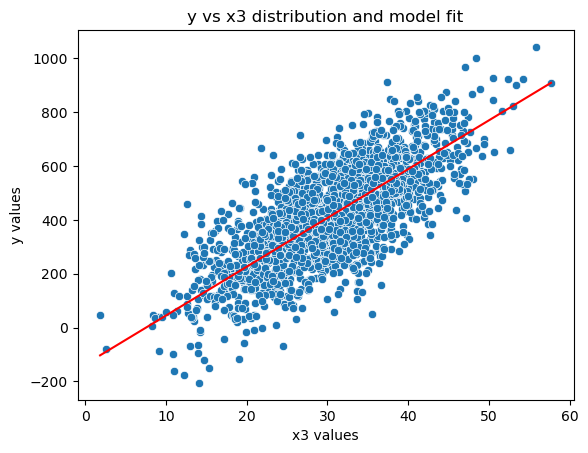

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


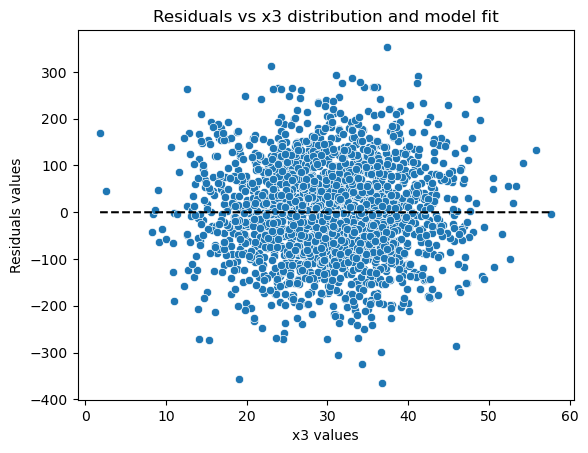

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


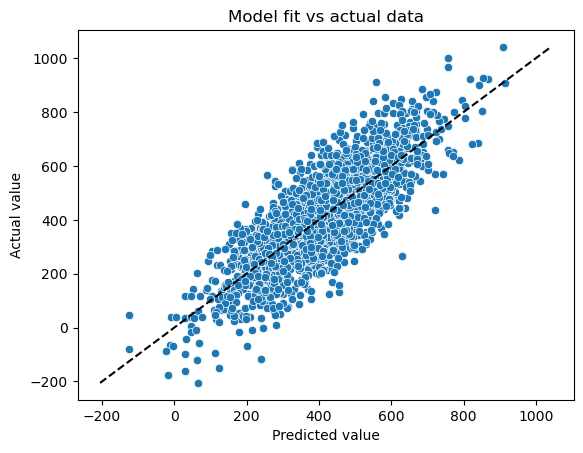

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


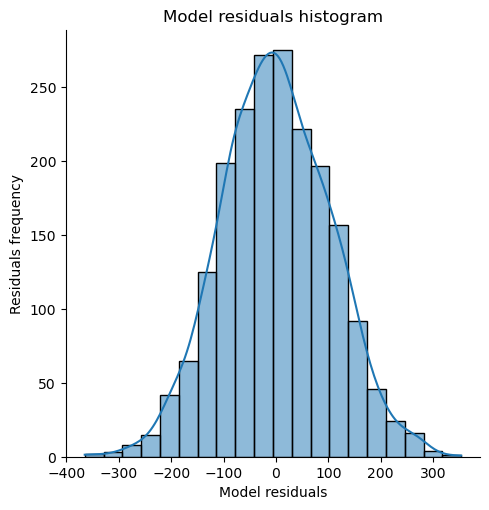

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.635899              True   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05  0.724071              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.779323              True   
5               Lilliefors test     0.95     0.05  0.398343              True   
6         Cramér–von Mises test     0.95     0.05  0.662844              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05  0.713611              True   
9                      skewtest     0.95     0.05  0.433271              True   
10                 kurtosistest     0.95     0.05  0.858706              True   

                  statistic critical_value statistic < critical_value  \
0                  0.999264                                             
1                         -              -                      False   
2                  0.645731                                             
3                  0.476538          0.785                       True   
4                  0.014634                                             
5                   0.01465                                             
6                   0.08512                                             
7  -102354536985693257728.0                                             
8                  0.674836                                             
9                  0.783607                                             
10                -0.178022                                             

               conclusion  
0   gaussian distribution  
1    count more than 1000  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8   gaussian distribution  
9   gaussian distribution  
10  gaussian distribution

In [16]:
# Обучим модель и выведем результаты
dt_collinearity, model_collinearity = train_model(dt_collinearity, target='y', feature_names=['x1', 'x2', 'x3'], show_results=True, return_norm_tests=True)

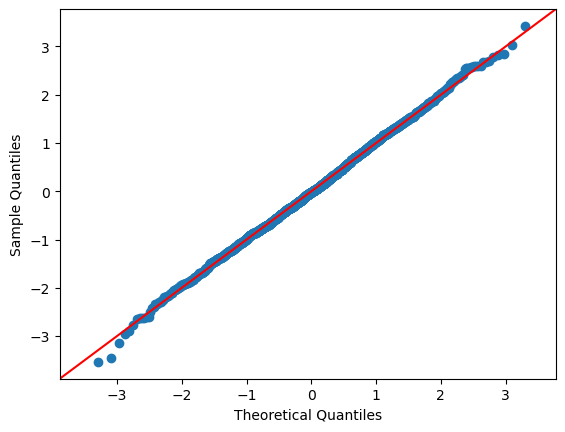

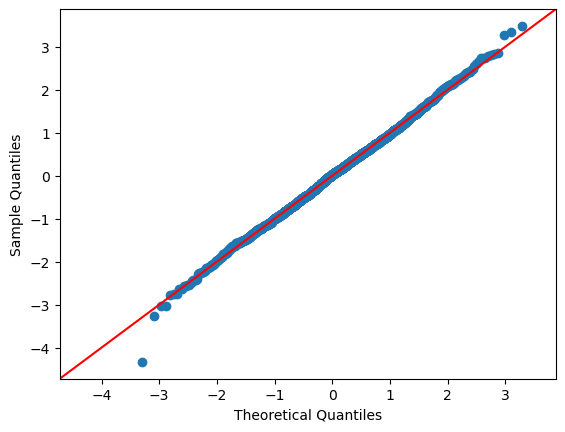

In [17]:
# Строим Q-Q plot для анализа остатков
sm.qqplot(model_collinearity.resid/ np.std(model_collinearity.resid), line='45');
plt.show()

# Пример "нормальной" ситуации
sm.qqplot((dt_collinearity['x1'] - np.mean(dt_collinearity['x1']))/ np.std(dt_collinearity['x1']), line='45');
plt.show()

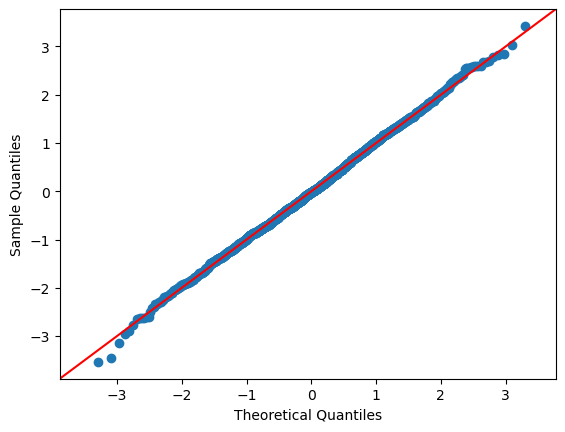

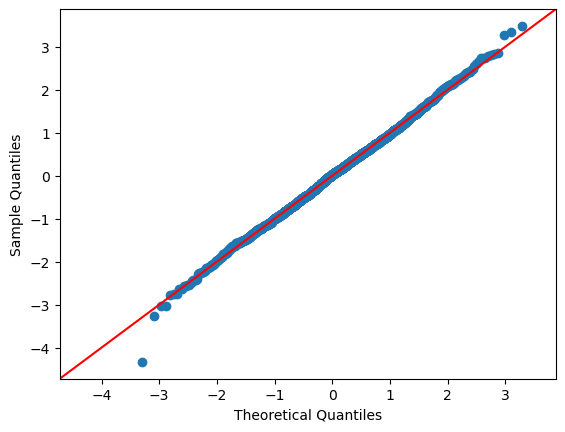

In [18]:
# Строим Q-Q plot для анализа остатков
sm.qqplot(model_collinearity.resid/ np.std(model_collinearity.resid), line='45');
plt.show()

# Пример "нормальной" ситуации
sm.qqplot((dt_collinearity['x1'] - np.mean(dt_collinearity['x1']))/ np.std(dt_collinearity['x1']), line='45');
plt.show()

In [19]:
# Рассчитываем VIF, используя пакет в Python
calc_VIF(dt_collinearity, feature_names=['x1', 'x2', 'x3'])

Feature         VIF
0   const  102.610711
1      x1    1.284883
2      x2   11.661209
3      x3   10.767764

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     284.5
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          1.99e-109
Time:                        11:39:22   Log-Likelihood:                -7234.7
No. Observations:                2000   AIC:                         1.448e+04
Df Residuals:                    1997   BIC:                         1.449e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.8637      0.856     96.751      0.0

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


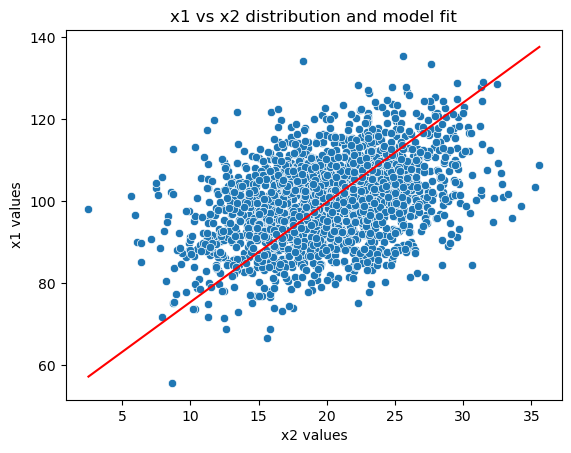

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


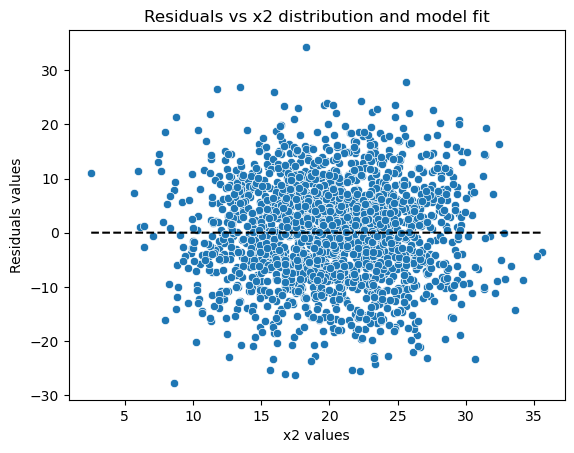

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


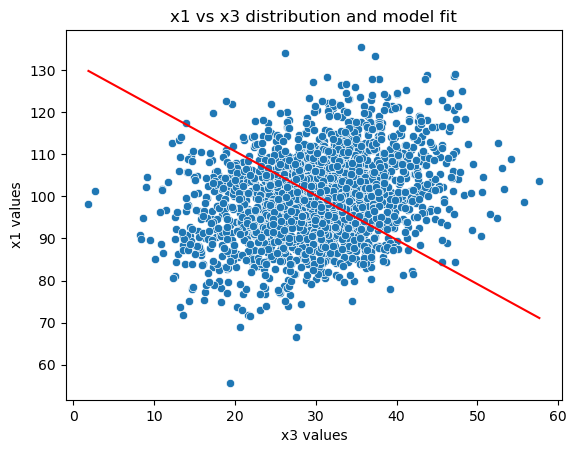

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


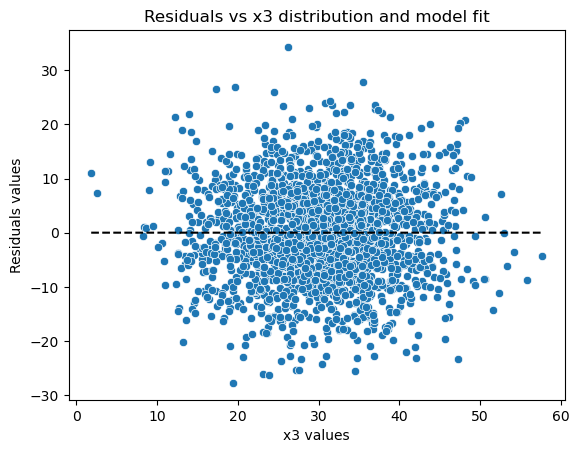

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


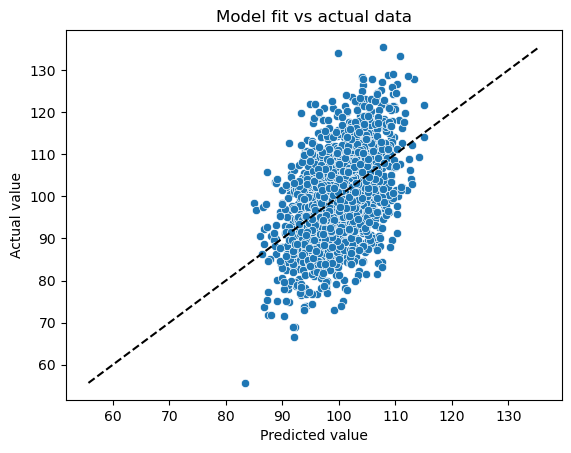

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


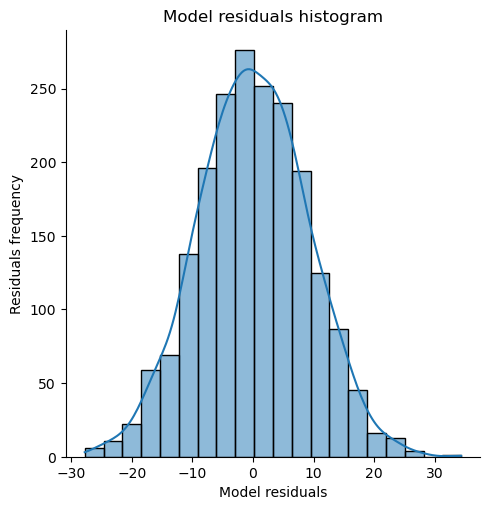

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.968939              True   
1              Epps-Pulley test     0.95     0.05         -                 -   
2   D'Agostino's K-squared test     0.95     0.05  0.922085              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.999852              True   
5               Lilliefors test     0.95     0.05      0.99              True   
6         Cramér–von Mises test     0.95     0.05  0.999334              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05  0.898002              True   
9                      skewtest     0.95     0.05  0.839566              True   
10                 kurtosistest     0.95     0.05  0.727683              True   

                  statistic critical_value statistic < critical_value  \
0                  0.999595                                             
1                         -              -                      False   
2                  0.162235                                             
3                  0.114962          0.785                       True   
4                  0.007468                                             
5                  0.007409                                             
6                  0.016117                                             
7  -140737488355327836160.0                                             
8                  0.215166                                             
9                  0.202449                                             
10                -0.348209                                             

               conclusion  
0   gaussian distribution  
1    count more than 1000  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8   gaussian distribution  
9   gaussian distribution  
10  gaussian distribution

In [20]:
# Проверяем результат руками...
dt_collinearity_test, model_collinearity_test = train_model(dt_collinearity, target='x1', feature_names=['x2', 'x3'], show_results=True, return_norm_tests=True)

In [21]:
# Считаем VIF для первого регрессора руками 
1 / (1 - model_collinearity_test.rsquared)

np.float64(1.2848833175941372)

## 3. Гетероскедастичность
При гетероскедастичности в модели мы более не можем использовать классические формулы расчета коэффициентов и должны применять формулу робастных ошибок

In [22]:
# Определим параметры выборки для задачи гетероскедастичности
# Создадим удобный словарь, чтобы передавать его в функцию
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 100.0,
    x1_std = 10.0,
    x2_mean = 20.0,
    x2_std = 5.0,
    corr_12 = 0.0,
    
    # Зададим параметры распределения ошибки
    e_mean = 0.0,
    e_std = 100.0,

    # Укажем размер выборки
    N = 100,

    # Зададим действительные параметры модели
    beta0 = 500.0,
    beta1 = 6.7,
    beta2 = 2.3,
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

x1         x2            y           e
0   104.967142  19.308678  1288.038362   40.348554
1   106.476885  27.615149  1341.983291   65.073315
2    97.658466  18.829315  1303.341068  105.721919
3   115.792128  23.837174  1475.247760  144.615002
4    95.305256  22.712800  1062.706537 -128.078120
..         ...        ...          ...         ...
95   95.534850  24.281994  1131.203447  -64.728638
96  102.140937  13.771306  1312.078886   96.060601
97  101.731809  21.926587  1264.585821   32.551549
98   91.161426  20.768626  1227.690340   69.140949
99  100.582087  14.285149  1271.952004   65.196178

[100 rows x 4 columns]

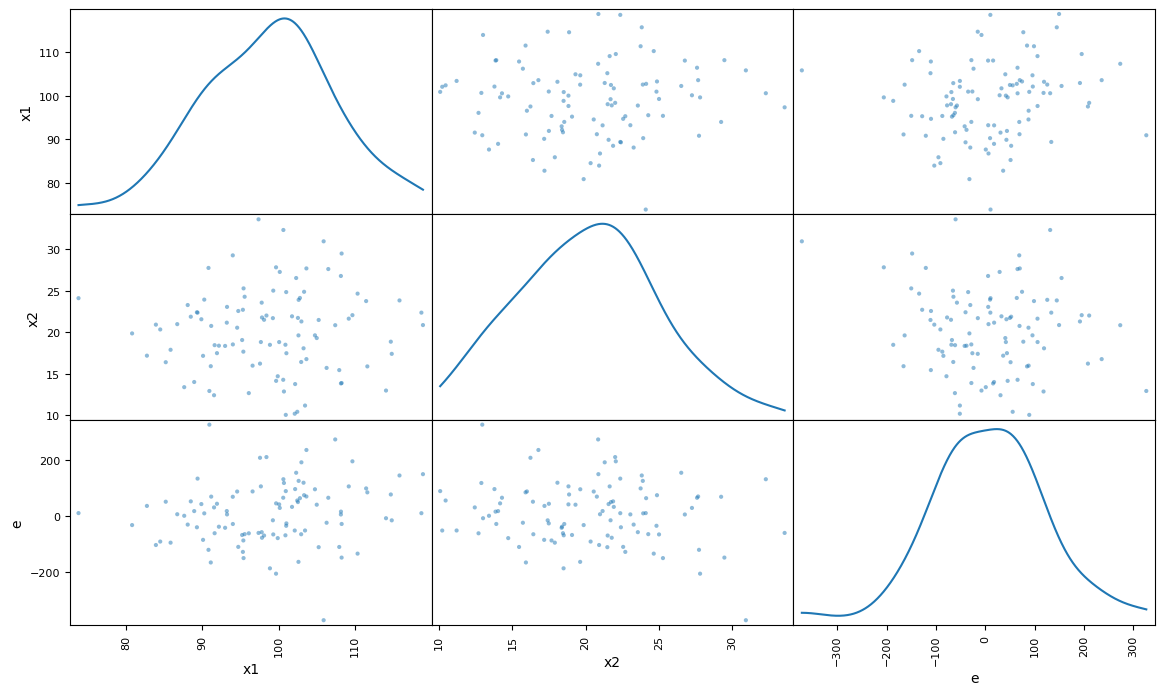

In [23]:
# Сгенерируем датасет, в котором исперсия ошибки будет скоррелирована с одним из регрессоров (пусть это будет регрессор х1)
dt_heteroskedasticity = gen_data(y_type='heteroskedasticity', params=dist_params, seed=RANDOM_SEED)

display(dt_heteroskedasticity)

# Посмотрим на корреляции глазами
pd.plotting.scatter_matrix(dt_heteroskedasticity[['x1', 'x2', 'e']], figsize = (14,8), diagonal = 'kde');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     24.37
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           2.66e-09
Time:                        11:39:23   Log-Likelihood:                -608.68
No. Observations:                 100   AIC:                             1223.
Df Residuals:                      97   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.1142    132.040      2.758      0.0

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


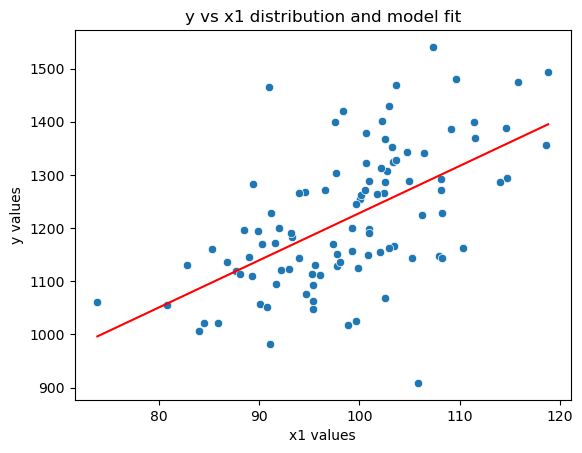

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


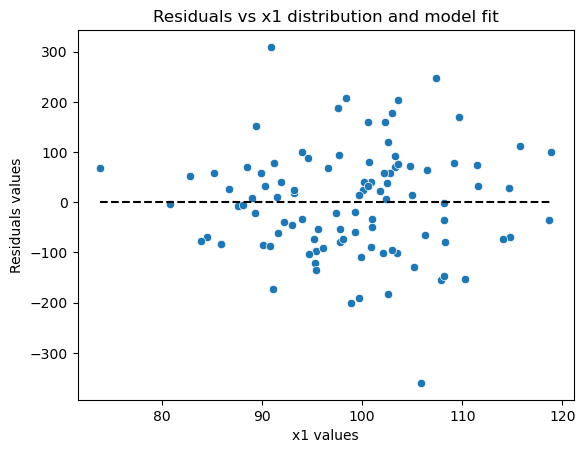

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


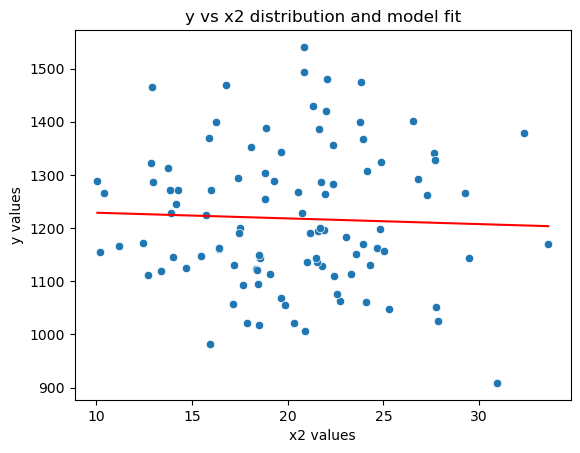

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


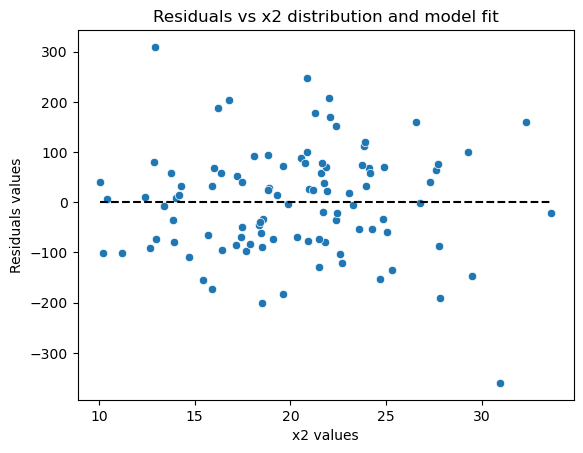

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


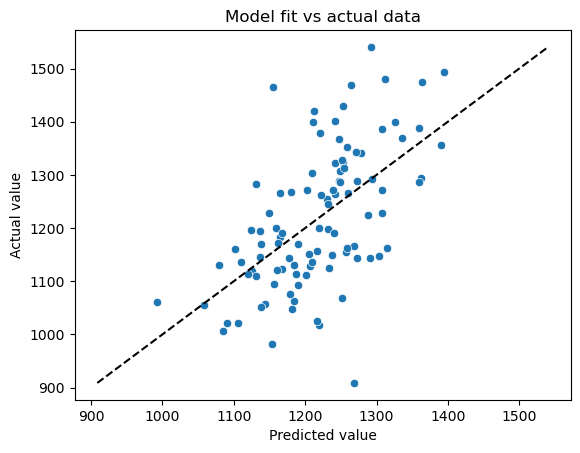

/Users/katiegalaeva/miniconda3/envs/env-01/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


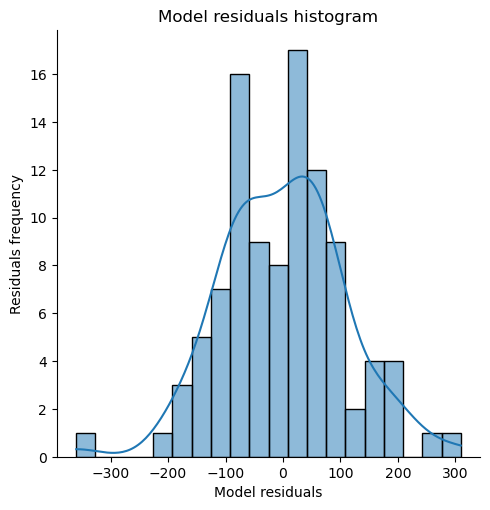

/Users/katiegalaeva/exp1/shad/math_12/utils.py:426: SyntaxWarning: invalid escape sequence '\E'
  """


FileNotFoundError: [Errno 2] No such file or directory: 'table/Epps_Pulley_test_table.csv'

In [24]:
# Строим OLS модель с обычной матрицей ошибок
dt_heteroskedasticity, model_heteroskedasticity = train_model(
    dt_heteroskedasticity, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=True)

##### Прогоняем тесты на гетероскедастичность 

In [ ]:
# Тест Вайта
from statsmodels.stats.diagnostic import het_white

# Получаем результаты теста
white_test = het_white(model_heteroskedasticity.resid, model_heteroskedasticity.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

NameError: name 'model_heteroskedasticity' is not defined

In [32]:
# Тест Голдфельда-Квандта
from statsmodels.stats.diagnostic import het_goldfeldquandt

# ------------ Реализовать тест в качестве домашнего задания ------------------

Немного о настройках для [Statsmodels](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html#statsmodels.regression.linear_model.RegressionResults.get_robustcov_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05247
Date:                Thu, 13 Feb 2025   Prob (F-statistic):              0.819
Time:                        13:07:47   Log-Likelihood:                -629.02
No. Observations:                 100   AIC:                             1262.
Df Residuals:                      98   BIC:                             1267.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1229.6160     49.954     24.615      0.0

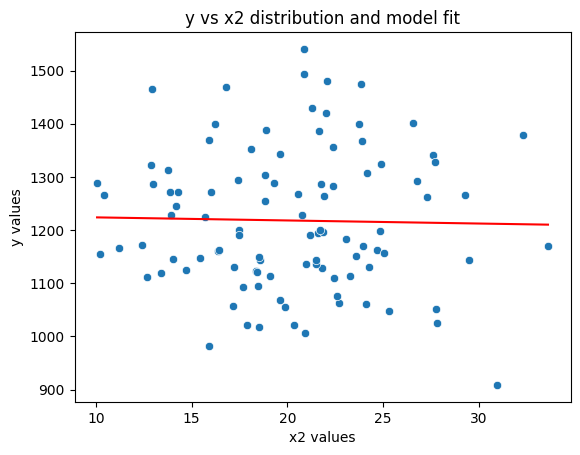

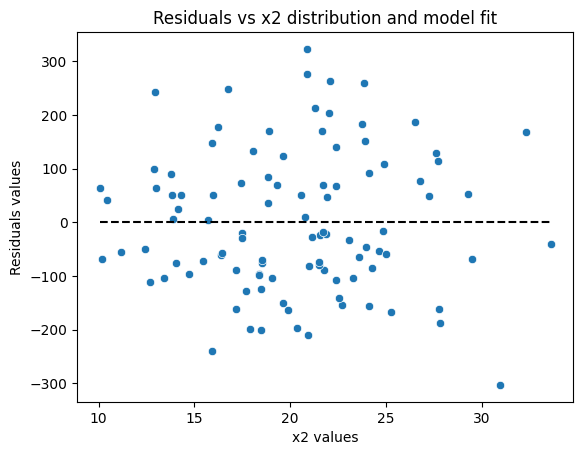

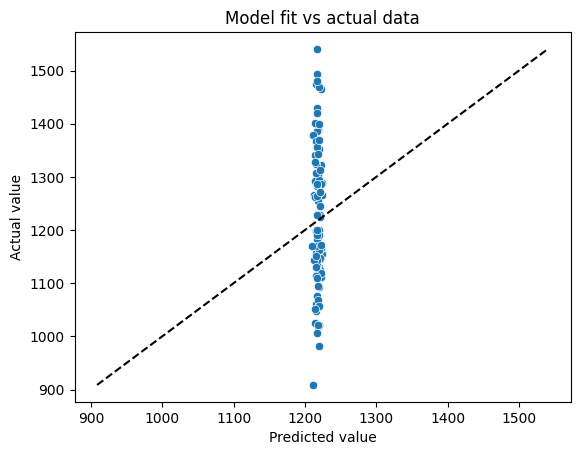

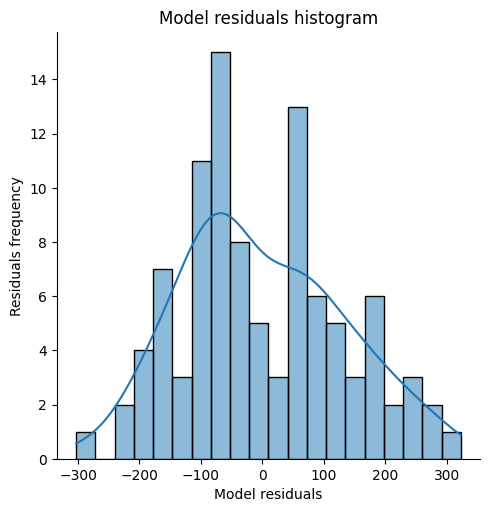

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.192917              True   
1              Epps-Pulley test     0.95     0.05  0.072825              True   
2   D'Agostino's K-squared test     0.95     0.05  0.254245              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.367428              True   
5               Lilliefors test     0.95     0.05  0.046278             False   
6         Cramér–von Mises test     0.95     0.05   0.44686              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05         -                 -   
9                      skewtest     0.95     0.05  0.214217              True   
10                 kurtosistest     0.95     0.05  0.274079              True   

                statistic critical_value statistic < critical_value  \
0                0.982095                                             
1                0.334196          0.376                       True   
2                2.738916                                             
3                0.690187          0.759                       True   
4                0.090241                                             
5                 0.08999                                             
6                0.132882                                             
7  -1513815000796804864.0                                             
8                       -                                             
9                1.242053                                             
10              -1.093718                                             

                   conclusion  
0       gaussian distribution  
1       gaussian distribution  
2       gaussian distribution  
3       gaussian distribution  
4       gaussian distribution  
5   not gaussian distribution  
6       gaussian distribution  
7       gaussian distribution  
8        count less than 2000  
9       gaussian distribution  
10      gaussian distribution

In [33]:
# Оцениваем регрессию с применением робастных ошибок
dt_heteroskedasticity, model_heteroskedasticity = train_model(
    dt_heteroskedasticity, target='y', feature_names=['x2'], show_results=True, return_norm_tests=True, robust=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     39.65
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.61e-13
Time:                        13:08:14   Log-Likelihood:                -608.68
No. Observations:                 100   AIC:                             1223.
Df Residuals:                      97   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.1142    127.645      2.853      0.0

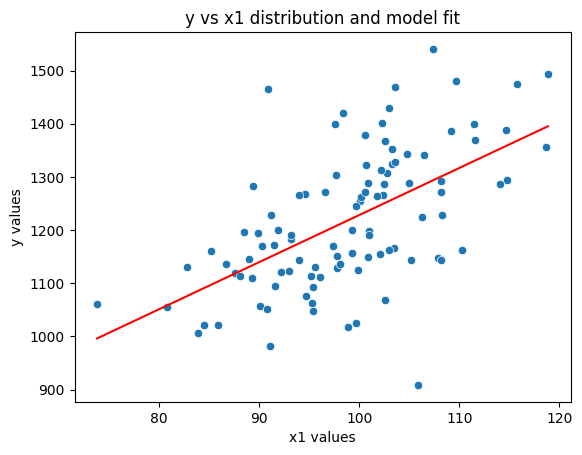

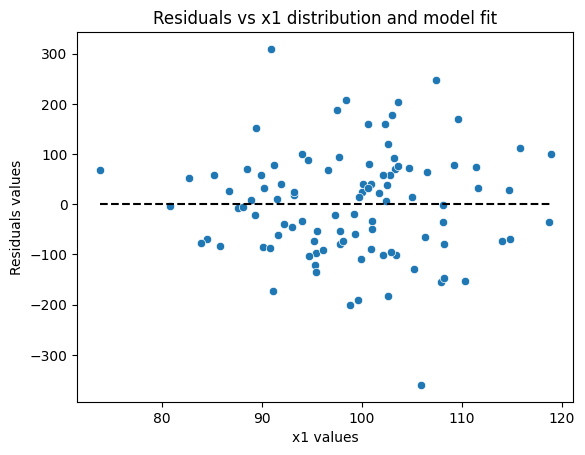

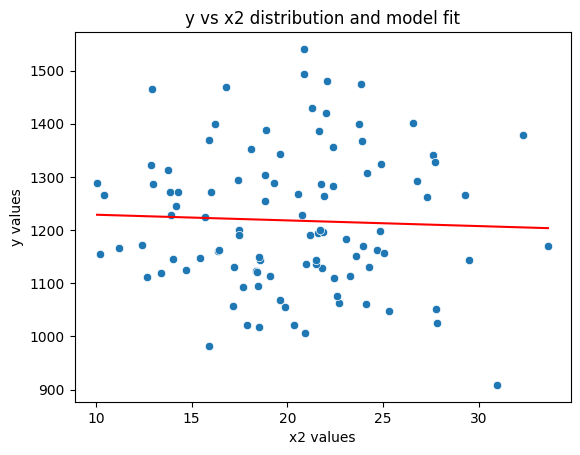

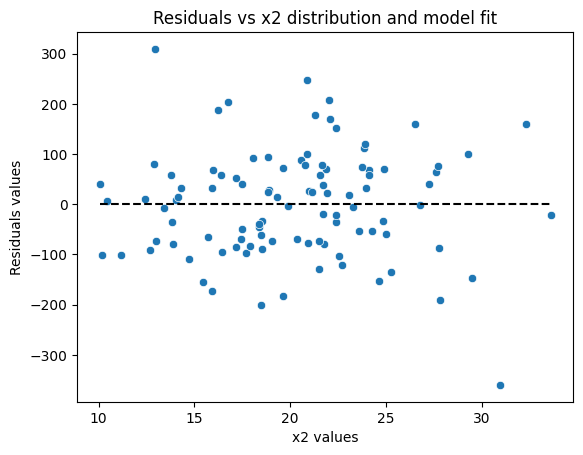

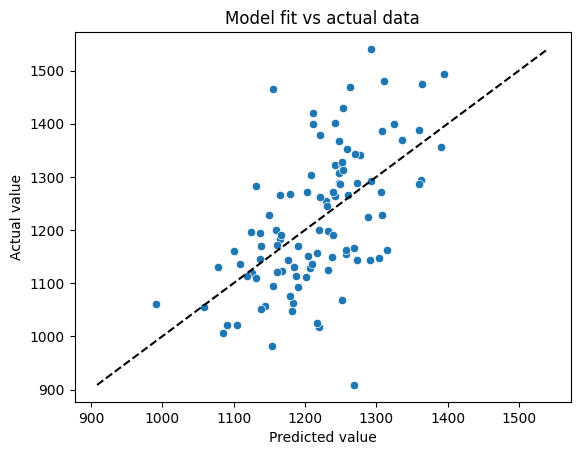

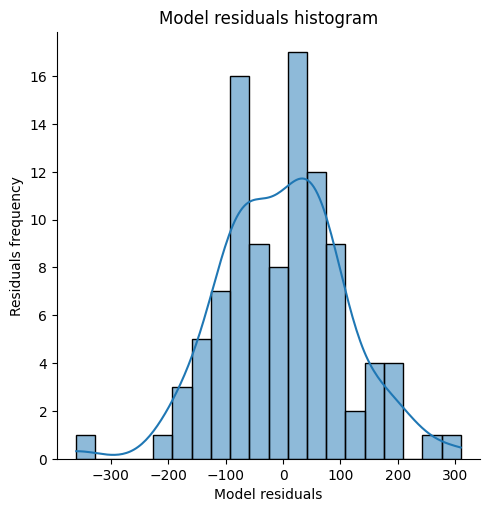

test  p_level  a_level    a_calc a_calc >= a_level  \
0             Shapiro-Wilk test     0.95     0.05  0.445676              True   
1              Epps-Pulley test     0.95     0.05  0.662537              True   
2   D'Agostino's K-squared test     0.95     0.05  0.286198              True   
3         Anderson-Darling test     0.95     0.05                               
4       Kolmogorov–Smirnov test     0.95     0.05  0.892112              True   
5               Lilliefors test     0.95     0.05  0.578085              True   
6         Cramér–von Mises test     0.95     0.05  0.864508              True   
7              Chi-squared test     0.95     0.05       1.0              True   
8              Jarque–Bera test     0.95     0.05         -                 -   
9                      skewtest     0.95     0.05  0.998941              True   
10                 kurtosistest     0.95     0.05  0.113692              True   

                 statistic critical_value statistic < critical_value  \
0                 0.987119                                             
1                 0.063814          0.376                       True   
2                 2.502142                                             
3                 0.371132          0.759                       True   
4                 0.056233                                             
5                 0.057368                                             
6                 0.052101                                             
7  -12867427506772842496.0                                             
8                        -                                             
9                -0.001327                                             
10                1.581816                                             

               conclusion  
0   gaussian distribution  
1   gaussian distribution  
2   gaussian distribution  
3   gaussian distribution  
4   gaussian distribution  
5   gaussian distribution  
6   gaussian distribution  
7   gaussian distribution  
8    count less than 2000  
9   gaussian distribution  
10  gaussian distribution

In [35]:
# Оцениваем регрессию с применением робастных ошибок
dt_heteroskedasticity, model_heteroskedasticity = train_model(
    dt_heteroskedasticity, target='y', feature_names=['x1', 'x2'], show_results=True, return_norm_tests=True, robust=True)

In [36]:
# Тест Вайта
from statsmodels.stats.diagnostic import het_white

# Получаем результаты теста
white_test = het_white(model_heteroskedasticity.resid, model_heteroskedasticity.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 12.072336552678287, 'Test Statistic p-value': 0.033809934144981145, 'F-Statistic': 2.5812118540637163, 'F-Test p-value': 0.031104591984117455}


## 4. Мультиколлинеарность
При мультиколлинеарности несколько регрессоров в модели имеют ненулевую корреляцию друг с другом